# Nitruro de Boro 

### Se presenta dicho material en su forma hexagonal simple en dos y tres dimensiones

primero se inicializan las librerias que se usan en el desarrollo del cristal

In [3]:
import numpy as np 
import math as mt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
import  scipy.spatial as sc
from scipy.spatial import Voronoi, voronoi_plot_2d

####  Vectores de traslación de la red hexágonal  simple:

$t_{1}=a(\frac{1}{2},\frac{\sqrt{3}}{2},0)$ 



$t_{2}=a(\frac{-1}{2},\frac{\sqrt{3}}{2},0)$ 



$t_{3}=c(0,0,1)$


Donde a y c son los parámetros de red  $a=2.5043A$,  $c=6.6562A$ para el caso de nitruro de boro:
https://www.researchgate.net/publication/277197056_Peliculas_delgadas_de_nitruro_de_boro

#### Los vectores de la base atómica

$d_{1}=(0,0,0)$


$d_{2}=a(0,\frac{\sqrt{3}}{3},0)$ 


$d_{3}=c(0,0,\frac{1}{2})$


$d_{4}=(0,\frac{\sqrt{3}}{3}a,\frac{c}{2})$


En este caso se toman cuatro átomos en la base atómica puesto que entre capa y capa se van alternando los átomos de nitrógeno y boro.


In [4]:
a=2.5043
c=6.6562                                   #parámetros de red
t1 = a*np.array([0.5,np.sqrt(3)/2,0])    
t2 = a*np.array([-0.5,np.sqrt(3)/2,0 ])
t3 = c*np.array([0,0,1])                  #vectores de traslación
d1 = np.array([0,0,0])                    
d2 =a*np.array([0,np.sqrt(3)/3,0])
d3 =np.array([0,0,c/2])
d4=np.array([0,a*(np.sqrt(3)/3),c/2])       #vectores de la base atómica

Listado con los elementos usados, boro y nitrógeno:

In [5]:
elementos=['N','B']  

## Clase de la red

Contiene información acerca de los vectores de traslación. ángulos, parámetros de red, volumen de la celda unitaria y los dibuja en el espacio tridimensional. 

In [6]:
class RedNB(object):
    """Clase que representa una red hexágonal de nitruro de boro.
      """
    
    def __init__(self, t1, t2, t3):
      
        m = np.array([t1,t2,t3], dtype=np.float64).reshape((3, 3))  #genera una matriz con los vectores de traslación
        lengths = np.sqrt(np.sum(m ** 2, axis=1)) #multiplica la matriz m y genera la suma de sus entradas
        angles = np.zeros(3)   #vector de 3 ceros 
        for i in range(3):
            j = (i + 1) % 3    #toma los índices con range(3)
            k = (i + 2) % 3
            angles[i] = np.dot(m[j], m[k]) / (lengths[j] * lengths[k])  #saca los ángulos entre los vectores.
            
        # atributos de la clase.
        self._angles = np.arccos(angles) * 180. / np.pi
        self._lengths = lengths
        self._matrix = m
        self._t1 = t1
        self._t2 = t2
        self._t3 = t3
        
    # propiedades 
    
    @property
    def angles(self):
        """
        Ángulos (alpha, beta, gamma) de la red.
        """
        return tuple(self._angles)

    @property
    def a(self):
        """
        Parámetro de red a
        """
        return self._lengths[0]

    @property
    def b(self):
        """
        Parámetro de red a
        """
        return self._lengths[1]

    @property
    def c(self):
        """
        Parámetro de red c
        """
        return self._lengths[2]

    @property
    def abc(self):
        """
        Longitudes de los vectores de red, i.e. (a, b, c)
        """
        return tuple(self._lengths)
    
    @property
    def vector1(self):
        """
        Vector de traslación 1
        """
        return self._t1

    @property
    def vector2(self):
        """
        vector de traslacion 2
        """
        return self._t2

    @property
    def vector3(self):
        """
        vector de traslación 3
        """
        return self._t3
    
    @property
    def matrix(self):
        """
      matriz de vector de traslación
        """
        return self._matrix
    
    @property
    def volumen(self):
        """
        Volumen de la celda unitaria.
        """
        m = self._matrix
        return abs(np.dot(np.cross(m[0], m[1]), m[2]))
        
    # graficamos los vectores.
    
    def plot (self,ax):
        """
        Incluye los vectores de red en el gráfico ax
        
        Argumentos:
            ax -> un eje con proyección 3d
        """
        Axes3D.plot3D(ax,[0,self._t1[0]],[0,self._t1[1]],[0,self._t1[2]],'k')
        Axes3D.plot3D(ax,[0,self._t2[0]],[0,self._t2[1]],[0,self._t2[2]],'k')
        Axes3D.plot3D(ax,[0,self._t3[0]],[0,self._t3[1]],[0,self._t3[2]],'k')
        Axes3D.grid(ax,False)
        


#### Ejemplo de como funciona la clase de la red

In [7]:
r1 = RedNB(t1,t2,t3)   #para los vectores de la red hexágonal pero pueden usarse para cualquiera

In [8]:
r1.angles #ángulos entre vectores

(90.0, 90.0, 60.00000000000002)

In [9]:
r1.abc    #parámetros de red

(2.5043, 2.5043, 6.6562)

In [10]:
r1.volumen #volumen de la celda unitaria  en A^3

36.15178133694381

In [11]:
r1.matrix #matriz de vectores de traslación

array([[ 1.25215   ,  2.16878742,  0.        ],
       [-1.25215   ,  2.16878742,  0.        ],
       [ 0.        ,  0.        ,  6.6562    ]])

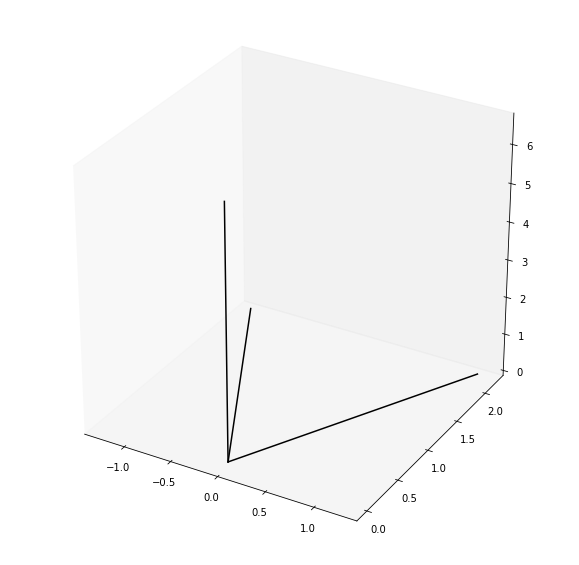

In [12]:
fig = plt.figure(figsize=(10,10))    #gráfica de los vectores de traslación
ax = fig.add_subplot(111, projection='3d')
r1.plot(ax)
plt.show()

## Clase de la base atómica  3D

In [13]:
class BaseNB(object):

    def __init__(self,d1,d2,d3,d4,elementos):   #pide de entrada 4 vectores de posición
        
            n = np.array([d1,d2,d3,d4], dtype=np.float64).reshape((4, 3))    #las unidades son en Angstroms
            dist = np.sqrt(np.sum(n ** 2, axis=1))
                
                
            self._dist = dist
            self._matriz = n
            self._d1 = d1
            self._d2 = d2
            self._d3 = d3
            self._d4 = d4
            self._elementos = elementos 
          
    
    @property
    def disprimeros(self):
        """distancia a primeros vecinos en el plano"""
        return self._dist[1]
    
    @property
    def displanos(self):
        """distancia entre planos"""
        return self._dist[2]
   
    @property
    def boro1(self):
        """elemento y posición"""
        print("El primer elemento de Boro, está ubicado en:")
        return self._d1
        
    @property
    def boro2(self):
        """elemento y posición"""
        print("El segundo elemento de Boro, está ubicado en:")
        return self._d4
    @property
    def nitrogeno1(self):
        """elemento y posición"""
        print("El primer elemento de Nitrógeno,está ubicado en:")
        return  self._d2
        return  self._d3
     
    @property
    def nitrogeno2(self):
        """elemento y posición"""
        print("El segundo elemento de Nitrógeno, está ubicado en:")
        return  self._d3   
    
    @property
    def nitrogenosymbol(self):
        """Simbolo de elemento"""
        return  self._elementos[0] 
    
    @property
    def borosymbol(self):
        """Simbolo de elemento"""
        return  self._elementos[1] 
    
    def plot (self,am):
        """
        Incluye los vectores de red en el gráfico am
        
        Argumentos:
            am -> un eje con proyección 2d
        """
        Axes3D.scatter(am,[self._d1[0]],[self._d1[1]],[self._d1[2]],c='b',marker='o', s=200,depthshade=True)
        Axes3D.scatter(am,[self._d2[0]],[self._d2[1]],[self._d2[2]],c='r',marker='o', s=200,depthshade=True)
        Axes3D.scatter(am,[self._d3[0]],[self._d3[1]],[self._d3[2]],c='r',marker='o', s=200,depthshade=True)
        Axes3D.scatter(am,[self._d4[0]],[self._d4[1]],[self._d4[2]],c='b',marker='o', s=200,depthshade=True)
        Axes3D.grid(am,False)


In [14]:
r2=BaseNB(d1,d2,d3,d4,elementos)

In [15]:
r2.nitrogenosymbol  #el origen del sistema 

'N'

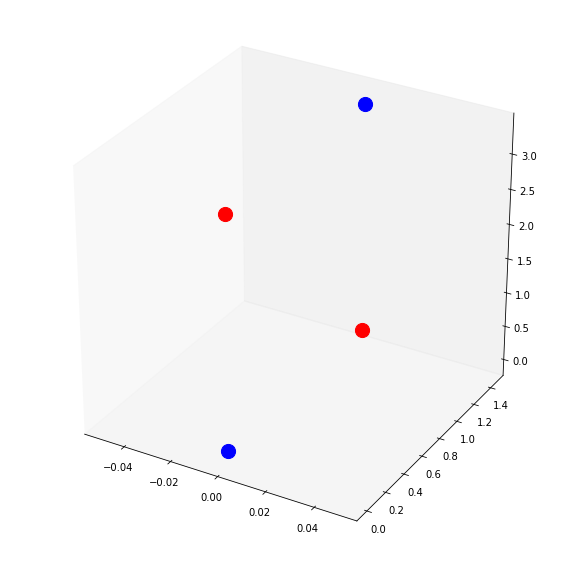

In [16]:
#gráfica de las posiciones de los átomos 
fig = plt.figure(figsize=(10,10))
am = fig.add_subplot(111, projection='3d')
r2.plot(am)
plt.show()

## Clase del cristal 

Ahora  se define la clase del cristal que aplicará las propiedades de traslación en donde cualquier elemento del cristal  (M) está descrito por: 
$M=d_{i}+a_{1}t_{1}+a_{2}t_{2}+a_{3}t_{3}$

In [17]:
class CrystalNB(object):

    def __init__(self, t1, t2 ,t3,d1,d2, d3,d4,n):
        
        #Para vizualizar el cristal, crear superceldas y aplicar las operaciones de traslación
        
        #se generan los posiciones de Boro para un plano para superceldas de nxn
        positionsB1=[]
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    positionsB1 += [(d1)+k*(t1)+i*(t2)+j*(t3)]
        #se generan las posiciones de Boro para el plano subsiguiente para superceldas         
        positionsB2=[]
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    positionsB2 += [(d4)+k*(t1)+i*(t2)+j*(t3)]   
        #se generan las posiciones de Nitrógeno para el plano donde se encuentran los primeros elementos de Boro.        
        positionsN1=[]
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    positionsN1 += [(d2)+k*(t1)+i*(t2)+j*(t3)]
        #se generan las posiciones de Nitrógeno para el plano subsiguiente.
        positionsN2=[]
        for i in range(n):
            for k in range(n):
                for j in range(n):
                     positionsN2 += [(d3)+k*(t1)+i*(t2)+j*(t3)]
                        
        #Se concatenan las posicones anteriores            
        K2 = np.concatenate((positionsN1,positionsN2), axis=0)
        K1 = np.concatenate((positionsB1,positionsB2), axis=0)               
        K  = np.concatenate((positionsN1,positionsN2,positionsB1,positionsB2), axis=0) 
        z  =  len(K)
            
        self._positionsB1 = positionsB1
        self._positionsB2 = positionsB2
        self._positionsN1 = positionsN1
        self._positionsN2 = positionsN2
        self._K1 = K1
        self._K2 = K2
        self._K  = K
        self._z  = z
        
        #Aqui vamos a generar los vectores de la red reciproca
        
        Omega=(np.dot(t1,np.cross(t2,t3))) #Volumen de la celda primitiva
        #Vectores de la red reciproca
        g1=np.array([2*np.pi*(np.cross(t2,t3))/Omega]) 
        g2=np.array([2*np.pi*(np.cross(t3,t1))/Omega])
        g3=np.array([2*np.pi*(np.cross(t1,t2))/Omega])
    
        #Definimos nuestra red recíproca como el arreglo de los 3 vectores anteriores 
    
        Rrecip=[g1,g2,g3]
        self.Rrecip=Rrecip
        
        hCN =[d1,d1+t1,d1+t2,d1+t3]
        hCB =[d2,d2+t1,d2+t2,d2+t3]
        hCB2 =[d3,d3+t1,d3+t2,d3+t3]
        hCN2 =[d4,d4+t1,d4+t2,d4+t3]
        #Necesitamos ahora definir definir los vectores hkl, para ello creamos una lista donde pondremos los valores de cada plano
     
        hkl=[]
        self.hkl=hkl
        
        #SG_N y SG_B nos serviran para definir el factor de estructura para cada atomo y luego sumarlos para obtener el del cristal
        SG_N=np.zeros((4,4,4),np.complex64)
        self.SG_N=SG_N
        SG_B=np.zeros((4,4,4),np.complex64)
        self.SG_B=SG_B
        SG_N2=np.zeros((4,4,4),np.complex64)
        self.SG_N2=SG_N2
        SG_B2=np.zeros((4,4,4),np.complex64)
        self.SG_B2=SG_B2
      
        G=np.zeros((4,4,4,3))
        d_hkl=np.zeros((4,4,4))
        self.d_hkl=d_hkl
        
        Z=np.array([7,5])
        
        for l in range(4):
            for k in range(4):
                for h in range(4):
                    G[h][k][l]=(h*g1+k*g2+l*g3)
                    if h==0 and k==0 and l==0:
                        d_hkl[h][k][l]=0
                    else:    
                        d_hkl[h][k][l]=(2*np.pi)/(mt.sqrt(np.dot(G[h][k][l],G[h][k][l])))
                        
        for l in range(4):
            for k in range(4):
                for h in range(4):
                    G[h][k][l]=(h*g1+k*g2+l*g3)
                    for i in range(len(hCN)):
                        SG_N[h][k][l]=((SG_N[h][k][l]+np.exp(-(np.dot(hCN[i],G[h][k][l])*1j))))
                           
        for l in range(4):
            for k in range(4):
                for h in range(4):
                    G[h][k][l]=(h*g1+k*g2+l*g3)
                    for i in range(len(hCB)):  
                        SG_B[h][k][l]=((SG_B[h][k][l]+np.exp(-(np.dot(hCB[i],G[h][k][l])*1j))))
    
        for l in range(4):
            for k in range(4):
                for h in range(4):
                    G[h][k][l]=(h*g1+k*g2+l*g3)
                    for i in range(len(hCN2)):
                        SG_N2[h][k][l]=((SG_N2[h][k][l]+np.exp(-(np.dot(hCN2[i],G[h][k][l])*1j))))
                           
        for l in range(4):
            for k in range(4):
                for h in range(4):
                    G[h][k][l]=(h*g1+k*g2+l*g3)
                    for i in range(len(hCB2)):  
                        SG_B2[h][k][l]=((SG_B2[h][k][l]+np.exp(-(np.dot(hCB2[i],G[h][k][l])*1j))))
                
        
        #S=Z[0]*SG_N+Z[1]*SG_B
        S=Z[0]*SG_N+Z[1]*SG_B+Z[0]*SG_N2+Z[1]*SG_B2 
        
        for l in range(4):
            for k in range(4):
                for h in range(4):
                    if S[h][k][l].real>0:
                        hkl.append([h,k,l])
                    if S[h][k][l].real<0:
                        hkl.append([h,k,l])  
                        
        self.S=S
        I=S.conjugate()*S
        self.I=I
        
        lambdaX=1.54
        theta0=[]
        self._theta0=theta0
        theta=[]
        self._theta=theta
        intensidad=[]
        self._intensidad=intensidad
        
        for i in range(1,len(hkl)):
            theta0.append((lambdaX/(2*d_hkl[hkl[i][0]][hkl[i][1]][hkl[i][2]])))
            intensidad.append(I[hkl[i][0]][hkl[i][1]][hkl[i][2]].real)
            
        self.longt=len(self._theta0) 
        
        for i in range(self.longt):
            if self._theta0[i]>1:
                self._theta0[i]=1
            theta.append(mt.asin(self._theta0[i])*180/mt.pi)
    @property
    def theta(self):
        """matriz de la base"""
        return self._theta
    @property
    def theta0(self):
        """matriz de la base"""
        return self._theta0 
    @property
    def intensidad(self):
        """matriz de la base"""
        return self._intensidad
    
        
    @property
    def posB(self):
        """posición de átomos de boro"""
        return self._K1
    
    @property
    def posN(self):
        """posición de átomos de Nitrógeno"""
        return self._K2
     
    @property
    def posatoms(self):
        """arreglo de posición de todos los átomos"""
        return self._K   
  
    @property
    def numofatoms(self):
        """número de átomos"""
        return self._z
    
    @property
    def numofatomspelement(self):
        """número de átomos"""
        return self._z/2
    
    
    def plot (self,acris3d):
        """
        supercelda
        
        Argumentos:
            ax -> un eje con proyección 2d
        """
        acris3d.scatter(self._K1[:,0],self._K1[:,1],self._K1[:,2], c='b',s=200 ,marker='o')
        acris3d.scatter(self._K2[:,0],self._K2[:,1],self._K2[:,2], c='r',s=200 ,marker='o')
        
    def Xray(self):
        fig=plt.figure(figsize=(10,10))
        plt.bar(self.theta,self.intensidad,width=0.4)
        plt.xlabel("2 theta (Grados)")
        plt.ylabel("Intensidad")
        plt.xlim(0,85)
        plt.xticks(np.arange(0, 85, 5.0))
        plt.grid(True)
        plt.show()   
    
    def recip(self):
        return self.recip()
    
    def G(self):
        return G  

In [18]:
r3=CrystalNB(t1,t2,t3,d1,d2,d3,d4,1)

In [19]:
r3.theta

[20.79571829323162,
 45.24095309123543,
 90.0,
 20.79571829323162,
 20.79571829323162,
 37.94772776960607,
 69.94099143880999,
 45.24095309123543,
 37.94772776960607,
 45.24095309123543,
 69.94099143880999,
 90.0,
 69.94099143880999,
 69.94099143880999,
 90.0,
 21.925955497733842,
 46.00790388344558,
 21.925955497733842,
 21.925955497733842,
 71.16217194032328,
 46.00790388344558,
 46.00790388344558,
 71.16217194032328,
 71.16217194032328,
 71.16217194032328,
 13.377344688182013,
 25.072779481252184,
 48.31532834763729,
 90.0,
 25.072779481252184,
 25.072779481252184,
 41.07344045509776,
 75.33288290633863,
 48.31532834763729,
 41.07344045509776,
 48.31532834763729,
 75.33288290633863,
 90.0,
 75.33288290633863,
 75.33288290633863,
 90.0,
 29.767330057815794,
 52.217781210264775,
 29.767330057815794,
 29.767330057815794,
 90.0,
 52.217781210264775,
 52.217781210264775,
 90.0,
 90.0,
 90.0]

In [20]:
r3.intensidad

[2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 2304.0,
 2304.0,
 9216.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0]

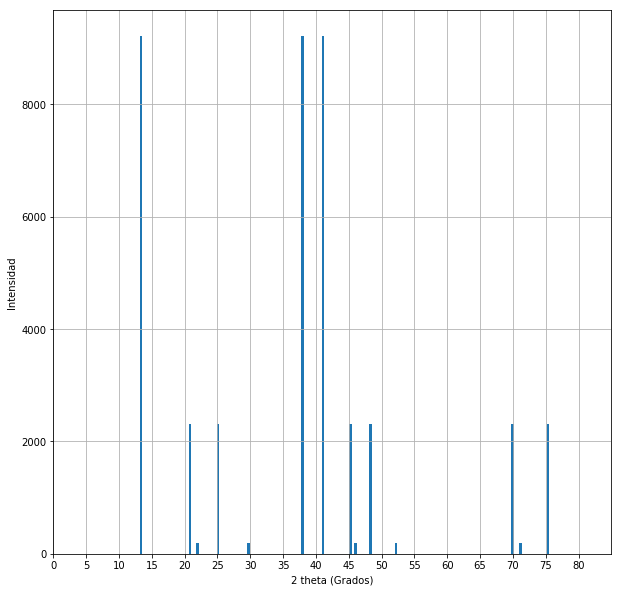

In [21]:
r3.Xray()

In [42]:
r3.posN

array([[0.        , 1.44585828, 0.        ],
       [0.        , 0.        , 3.3281    ]])

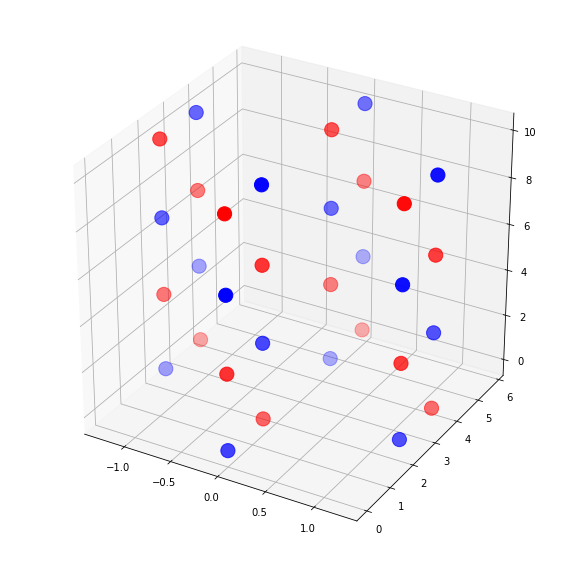

In [25]:
fig = plt.figure(figsize=(10,10))                   
acris3d = fig.add_subplot(111, projection='3d')
r3.plot(acris3d)
plt.show()

 #### Se verifican las simetrías del cristal

Se define el tensor métrico de la red G y se verifican las simetrías escritas como operadores A.


Para cualquier simetría que satisfaga el cristal se debe cumplir la siguiente condición:


$G=A^{t}GA$  donde $A^{t}$ es la matriz transpuesta


In [26]:
class Simetrias(object):

    def __init__(self, t1, t2 ,t3):
        
        
        A=[]
        B=[]
        C=[]
        m = np.array([t1,t2,t3], dtype=np.float64).reshape((3, 3))    #se crea la matriz del tensor métrico con los vectores de la red
        for i in range(3):
                A += [np.dot(t1,m[i])]
           
        for j in range(3):
                B += [np.dot(t2,m[j])]            
             
        for k in range(3):
                C += [np.dot(t3,m[k])]
               
        G = np.array([A,B,C], dtype=np.float64).reshape((3, 3))
        #Creación de las matrices de reflexión 
        YZ =  np.matrix([[-1,0,0],[0,1,0],[0,0,1]])
        XZ =  np.matrix([[1,0,0],[0,-1,0],[0,0,1]])
        XY =  np.matrix([[1,0,0],[0,1,0],[0,0,-1]])
        diag = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
        #inversión 
        inv = np.matrix([[-1,0,0],[0,-1,0],[0,0,-1]])
        #rotaciones en el eje z 
        RZ180 = np.matrix([[-1,0,0],[0,-1,0],[0,0,1]])
        RZ60 =  np.matrix([[0.5,-np.sqrt(3)/2,0],[-np.sqrt(3)/2,0.5,0],[0,0,1]])
        RZ90 =   np.matrix([[0,-1,0],[1,0,0],[0,0,1]])
        RZ120 =  np.matrix([[-0.5,-np.sqrt(3)/2,0],[np.sqrt(3)/2,-0.5,0],[0,0,1]])
        #rotaciones en el eje y 
        RY180 = np.matrix([[-1,0,0],[0,1,0],[0,0,-1]])
        RY60 =  np.matrix([[0.5,0,-np.sqrt(3)/2],[0,1,0],[-np.sqrt(3)/2,0,0.5]])
        RY90 =   np.matrix([[0,0,1],[0,1,0],[-1,0,0]])
        RY120 =  np.matrix([[-0.5,0,-np.sqrt(3)/2],[0,1,0],[-np.sqrt(3)/2,0,-0.5]])
        #rotaciones en el x
        RX180 = np.matrix([[1,0,0],[0,-1,0],[0,0,-1]])
        RX60 =  np.matrix([[1,0,0],[0,0.5,-np.sqrt(3)/2],[0,np.sqrt(3)/2,0.5]])
        RX90 =   np.matrix([[1,0,0],[0,0,1],[0,1,0]])
        RX120 =  np.matrix([[1,0,0],[0,-0.5,-np.sqrt(3)/2],[0,np.sqrt(3)/2,-0.5]])  
        
        
        self._G = G
        self._YZ = YZ
        self._XZ = XZ
        self._XY = XY
        self._inv =inv
        self._RZ180 = RZ180
        self._RZ60 = RZ60
        self._RZ90  = RZ90
        self._RZ120 = RZ120
        self._RY180 = RY180
        self._RY60 = RY60
        self._RY90  = RY90
        self._RY120 = RY120
        self._RX180 = RX180
        self._RX60 = RX60
        self._RX90  = RX90
        self._RX120 = RX120
    @property
    def reflexionYZ(self):
        """reflexión respecto al plano ZY"""
        if np.all(self._G) == np.all(np.dot(self._YZ.transpose(),np.dot(self._G,self._YZ))):
            print("el cristal presenta reflexión respecto al plano ZY")
        else:
            print("el cristal NO presenta reflexión respecto al plano ZY")
     
    @property
    def reflexionXZ(self):
        """reflexión respecto al plano XZ"""
        if np.all(self._G) == np.all(np.dot(self._XZ.transpose(),np.dot(self._G,self._XZ))):
            print("el cristal presenta reflexión respecto al plano XZ")
        else:
            print("el cristal NO presenta reflexión respecto al plano XZ")
    
    @property
    def reflexionXY(self):
        """reflexión respecto al plano XY"""
        if np.all(self._G) == np.all(np.dot(self._XY.transpose(),np.dot(self._G,self._XY))):
            print("el cristal presenta reflexión respecto al plano XY")
        else:
            print("el cristal NO presenta reflexión respecto al plano XY")
    
    @property
    def inversion(self):
        """inverisión"""
        if np.all(self._G) == np.all(np.dot(self._inv.transpose(),np.dot(self._G,self._inv))):
            print("el cristal presenta simetría de inversión")
        else:
            print("el cristal NO presenta simetría de inversión")
            
    @property
    def rotZ180(self):
        """inverisión"""
        if np.all(self._G) == np.all(np.dot(self._RZ180.transpose(),np.dot(self._G,self._RZ180))):
            print("el cristal es simétrico respecto a rotaciones de 180 en el eje z")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 180 en el eje z")
                               
    @property
    def rotZ60(self):
        """inverisión"""
        if np.all(self._G) == np.all(np.dot(self._RZ60.transpose(),np.dot(self._G,self._RZ60))):
            print("el cristal es simétrico respecto a rotaciones de 60 en el eje z")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 60 en el eje z")              
            
    @property
    def rotZ90(self):
       
        if np.all(self._G) == np.all(np.dot(self._RZ90.transpose(),np.dot(self._G,self._RZ90))):
            print("el cristal es simétrico respecto a rotaciones de 90 en el eje z")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 90 en el eje z")     
      
    @property
    def rotZ120(self):
        
        if np.all(self._G) == np.all(np.dot(self._RZ120.transpose(),np.dot(self._G,self._RZ120))):
            print("el cristal es simétrico respecto a rotaciones de 120 en el eje z")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 120 en el eje z")     
    
    @property
    def rotY180(self):
        
        if np.all(self._G) == np.all(np.dot(self._RY180.transpose(),np.dot(self._G,self._RY180))):
            print("el cristal es simétrico respecto a rotaciones de 180 en el eje Y")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 180 en el eje Y") 
     
    @property
    def rotY60(self):
       
        if np.all(self._G) == np.all(np.dot(self._RY60.transpose(),np.dot(self._G,self._RY60))):
            print("el cristal es simétrico respecto a rotaciones de 60 en el eje Y")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 60 en el eje Y")
    
    @property
    def rotY90(self):
       
        if np.all(self._G) == np.all(np.dot(self._RY90.transpose(),np.dot(self._G,self._RY90))):
            print("el cristal es simétrico respecto a rotaciones de 90 en el eje Y")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 90 en el eje Y")           
      
    @property
    def rotY120(self):
       
        if np.all(self._G) == np.all(np.dot(self._RY120.transpose(),np.dot(self._G,self._RY120))):
            print("el cristal es simétrico respecto a rotaciones de 120 en el eje Y")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 120 en el eje Y")    
    
    @property
    def rotX180(self):
       
        if np.all(self._G) == np.all(np.dot(self._RX180.transpose(),np.dot(self._G,self._RX180))):
            print("el cristal es simétrico respecto a rotaciones de 180 en el eje X")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 180 en el eje X")   
            
    @property
    def rotX60(self):
       
        if np.all(self._G) == np.all(np.dot(self._RX60.transpose(),np.dot(self._G,self._RX60))):
            print("el cristal es simétrico respecto a rotaciones de 60 en el eje X")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 60 en el eje X")   
            
    @property
    def rotX90(self):
       
        if np.all(self._G) == np.all(np.dot(self._RX90.transpose(),np.dot(self._G,self._RX90))):
            print("el cristal es simétrico respecto a rotaciones de 90 en el eje X")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 90 en el eje X")        
            
                   
    @property
    def rotX120(self):
       
        if np.all(self._G) == np.all(np.dot(self._RX120.transpose(),np.dot(self._G,self._RX120))):
            print("el cristal es simétrico respecto a rotaciones de 120 en el eje X")
        else:
            print("el cristal NO es simétrico respecto a rotaciones de 120 en el eje X")            
            


In [27]:
r4=Simetrias(t1,t2,t3)

In [28]:
r4.rotX120

el cristal NO es simétrico respecto a rotaciones de 120 en el eje X


In [29]:
X= np.zeros((3, 3))

#  Estructura de fonones de cristal cúbico 2D monoatómico 

Clásicamente, las vibraciones pueden interpretarse debido a propagaciones de ondas elásticas, que van distorsionando nudos de la red. Cuánticamente, los osciladores están cuantizados, donde para el caso de un arreglo periódico y elástico de átomos que es excitado, se tomó la idea de tomar el movimiento ondulatiorio como el desplazamiento de una partícula llamada fonón.

Los fonones son la descripción de un tipo especial de vibración en el arreglo de algún material en el cual se propaga una perturbación. Cuando un material vibra, la vibración puede ser descrita como la suma de ciertas vibraciones elementales llamadas modos normales de vibración.

En el presente trabajo se presenta la estructura de bandas fonónicas asociada a una red cuadrada monoatómica, implementando el método de la matriz dinámica.


In [1]:
import numpy as np 
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
import  scipy.spatial as sc
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.image as mpimg